In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/41467_2022_32829_MOESM5_ESM.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler

df['Normalized Observed'] = MinMaxScaler().fit_transform(df[['Observed']])

In [4]:
sequences = {}

for index, row in df.iterrows():
    key = (row['UP'], row['h35'], len(row['spacs']), row['h10'], row['disc'], row['ITR'])
    if key not in sequences:
        sequences[key] = [row['Normalized Observed']]
    else:
        sequences[key].append(row['Normalized Observed'])

print(len(df)-len(sequences))


2150


In [5]:
# 'key' column with length
df['key'] = df.apply(lambda row: (row['UP'], row['h35'], len(row['spacs']), row['h10'], row['disc'], row['ITR']), axis=1)

# Identify duplicated rows based on the 'key' column
duplicated_rows = df[df.duplicated('key', keep=False)]

# Group duplicated rows by 'key' and compute the range for 'Normalized Observed' values
grouped = duplicated_rows.groupby('key')['Normalized Observed'].agg(['min', 'max'])
grouped['range'] = grouped['max'] - grouped['min']


In [6]:
grouped['range'] = grouped['max'] - grouped['min']

# Calculate the average range
average_range = grouped['range'].mean()

print(f"Average range of 'Normalized Observed' values for duplicated rows: {average_range}")


Average range of 'Normalized Observed' values for duplicated rows: 0.25724056243543497


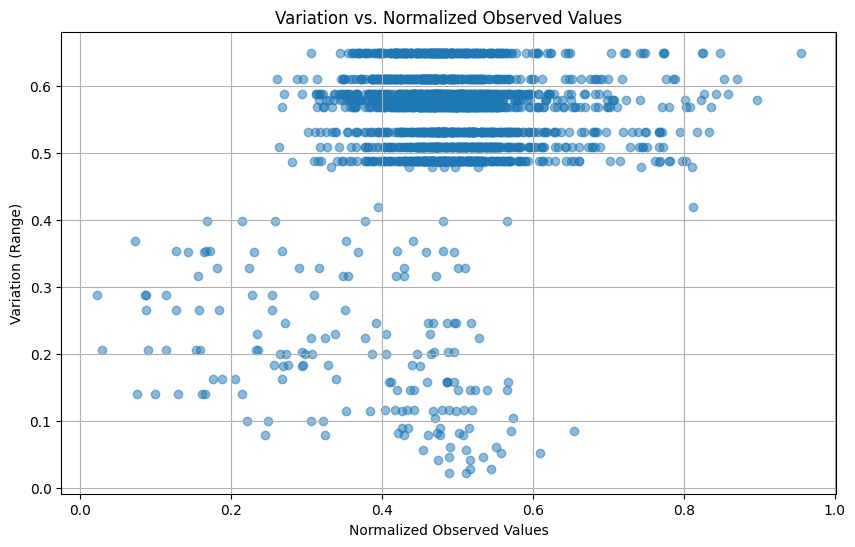

In [7]:
# Plot the variation of 'Normalized Observed' values compared to the 'Normalized Observed' values

plot_df = pd.merge(duplicated_rows, grouped, left_on='key', right_index=True)

# Plot using the DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Normalized Observed'], plot_df['range'], alpha=0.5)
plt.title('Variation vs. Normalized Observed Values')
plt.xlabel('Normalized Observed Values')
plt.ylabel('Variation (Range)')
plt.grid(True)
plt.show()

In [8]:
ranges = grouped['range']

mean_range = ranges.mean()
median_range = ranges.median()
mode_range = stats.mode(ranges).mode
std_dev_range = ranges.std()

print(f"mean range of {mean_range:.3f}")
print(f"median range of {median_range:.3f}")
print(f"mode range of {mode_range:.3f}")
print(f"standard deviation of {std_dev_range:.3f}")


mean range of 0.257
median range of 0.202
mode range of 0.022
standard deviation of 0.186
